# BAX 453 individual HW_Cindy Jeon

# 1. Develop ML models in Python

In [1]:
# necessary imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read the datasets
df = pd.read_csv("Churn_Modelling.csv")
# Print the datasets
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Print Basic information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
# Summarize the key statistics
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## # Check for missing values

In [5]:
# Count of the missing values of the dataset
missing_values = df.isna().sum()
missing_values

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

- There is no missing values

# 1) Data Exploration and Visualization

## #  Histogram to see the whole picture

In [6]:
# Drop unnecessary columns such as 'Customerid','rownumber' column from the DataFrame
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

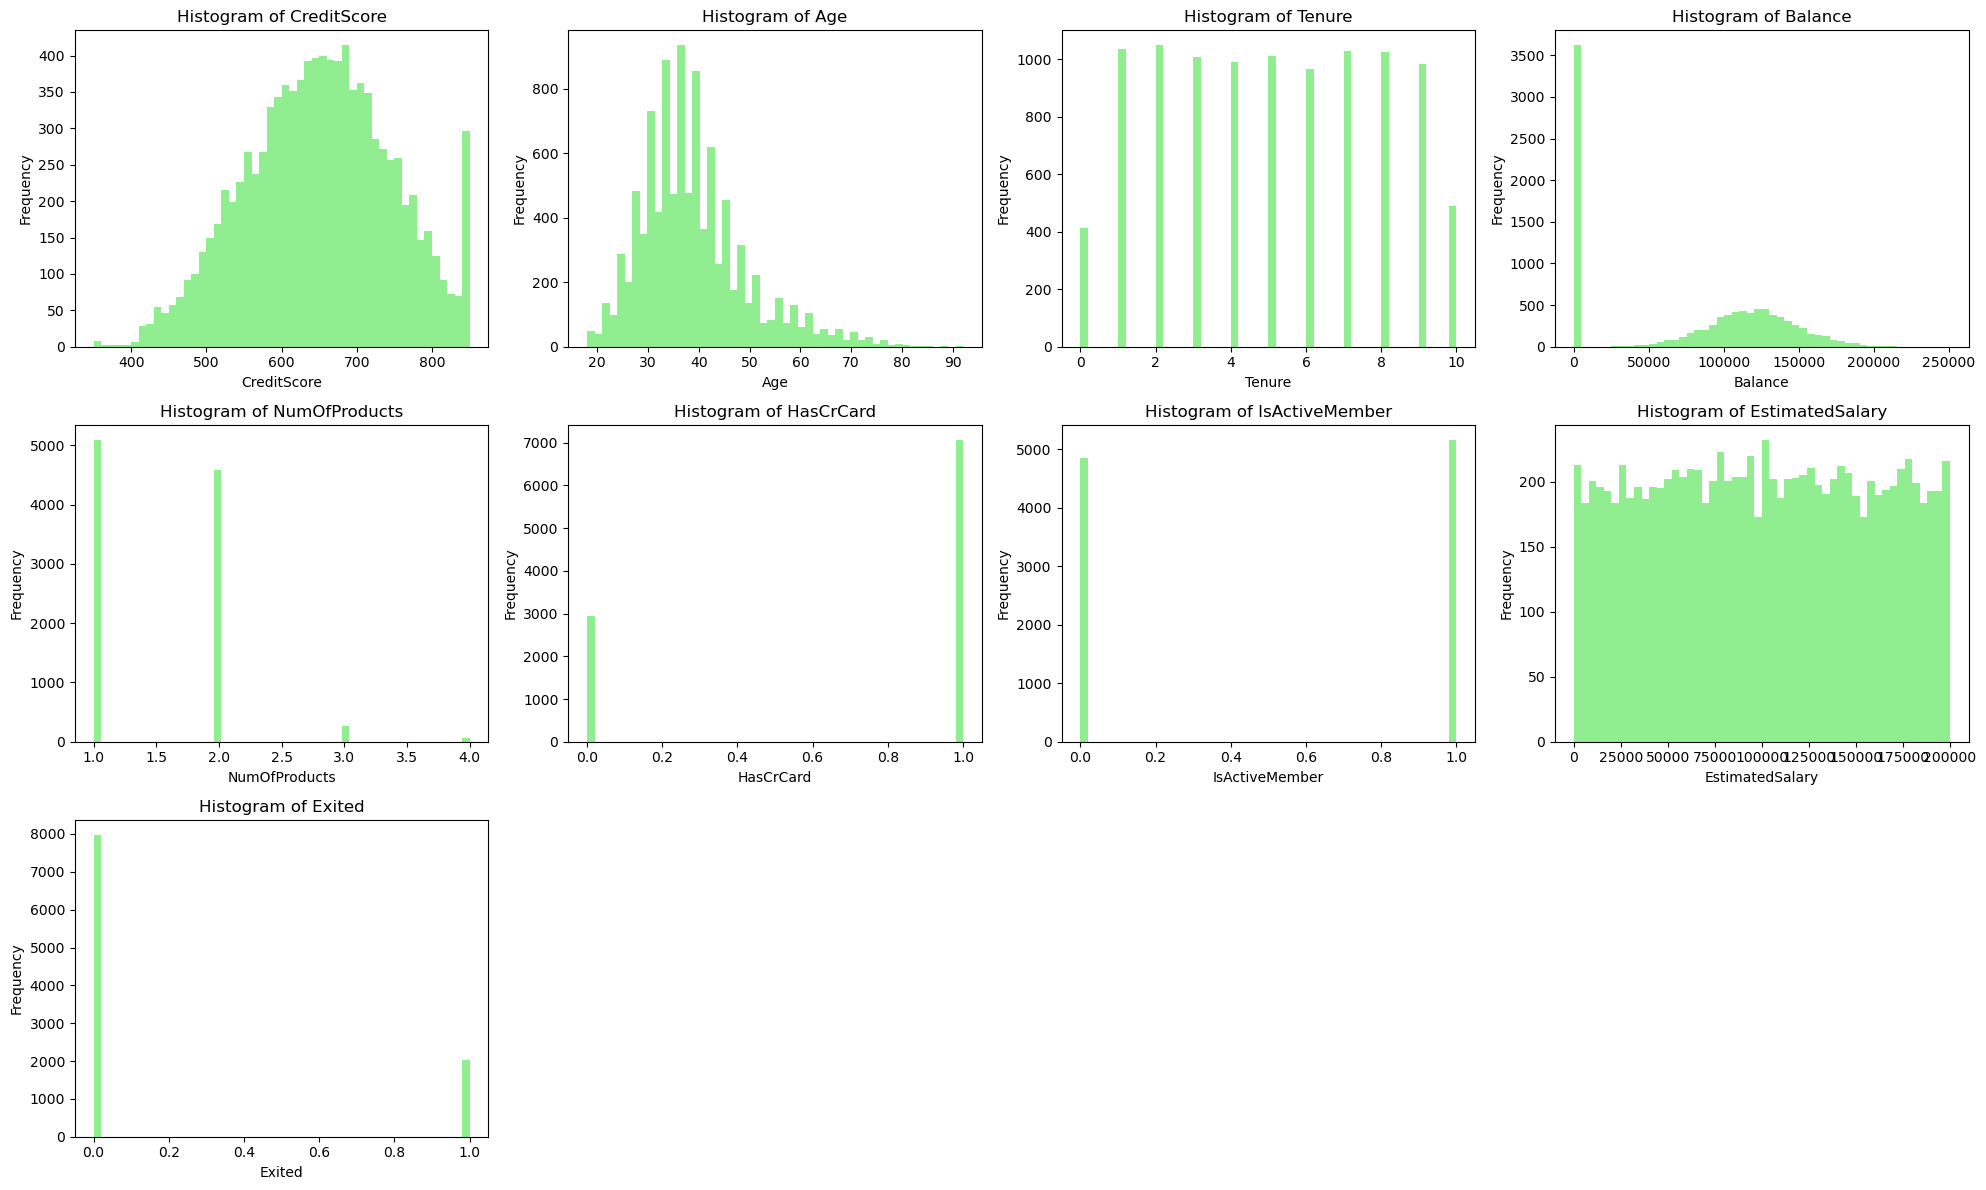

In [7]:
# Filtering out non-numeric columns and columns with all null values
numeric_df = df.select_dtypes(include=[np.number])

# Number of numeric variables
num_vars = len(numeric_df.columns)

# Calculate the number of rows and columns for the subplots
n_cols = 4  
n_rows = (num_vars + n_cols - 1) // n_cols  # Ceiling division

# Create a figure with subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, n_rows * 4))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over the numeric variables and plot histograms
for ax, var in zip(axes, numeric_df.columns):
    ax.hist(numeric_df[var], bins=50, color='lightgreen')
    ax.set_title(f'Histogram of {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Frequency')

# Hide any unused axes
for ax in axes[len(numeric_df.columns):]:
    ax.set_visible(False)

# Adjust the layout
plt.tight_layout()
plt.show()

- Credit Score : The overall distribution is bell-shaped, primarily ranging between 600 and 700, which suggests that the credit scores are normally distributed. However, there is also a significant concentration of data around 900
- Age :  The overall distribution is somewhat right-skewed. However, overall histogram is focused between 30~50.
- Tenure : There are balance from 1 to 9 years
- Balance: The overall distribution is bell-shaped, primarily ranging between 100K and 150K, which suggests that the credit scores are normally distributed. However, there is also a significant concentration of data around zero
- NumOfProducts: Data is focused on 1 and 2
- Estimated Salary : Data is evenly distributed from 0 to 100K
- Exited : There are more people who DID NOT exited

## #  Histogram for Only Exited

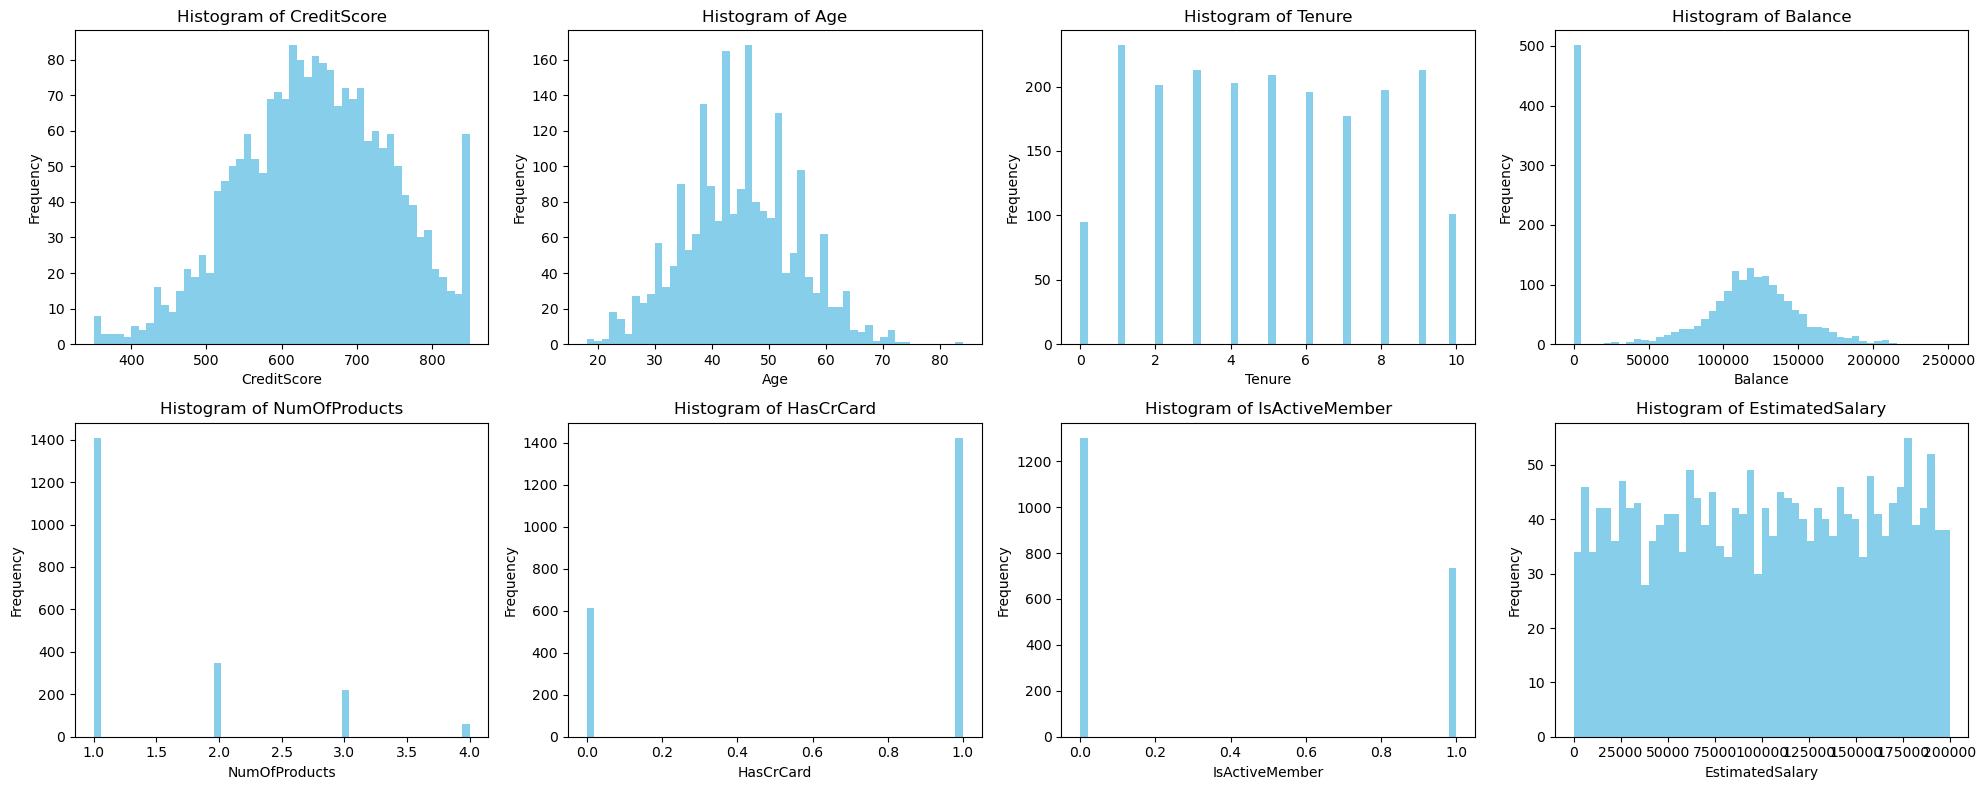

In [8]:
# Filtering out non-numeric columns and columns with all null values
numeric_exited_df = df[df['Exited'] == 1].select_dtypes(include=[np.number])

# Drop unnecessary columns such as 'Customerid','rownumber' column from the DataFrame
numeric_exited_df = numeric_exited_df.drop(['Exited'], axis=1)

# Number of numeric variables
num_vars = len(numeric_exited_df.columns)

# Calculate the number of rows and columns for the subplots
n_cols = 4  
n_rows = (num_vars + n_cols - 1) // n_cols  # Ceiling division

# Create a figure with subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, n_rows * 4))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over the numeric variables and plot histograms
for ax, var in zip(axes, numeric_exited_df.columns):
    ax.hist(numeric_exited_df[var], bins=50, color='skyblue')
    ax.set_title(f'Histogram of {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Frequency')

# Hide any unused axes
for ax in axes[len(numeric_exited_df.columns):]:
    ax.set_visible(False)

# Adjust the layout
plt.tight_layout()
plt.show()

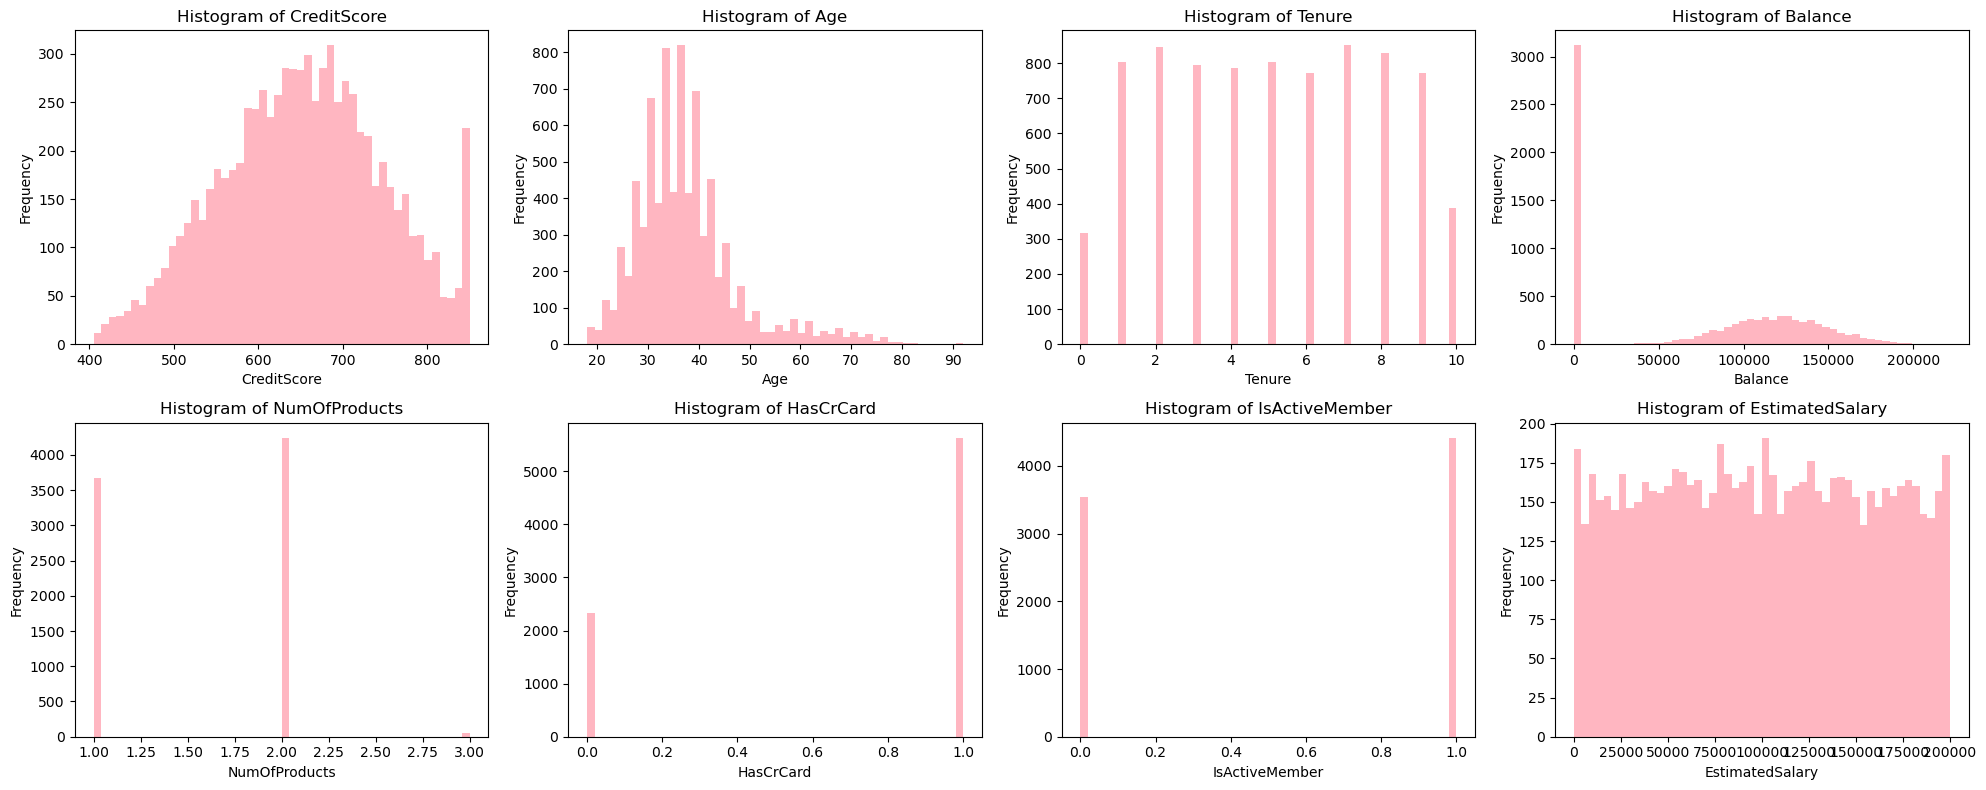

In [9]:
# Filtering out non-numeric columns and columns with all null values
numeric_not_exited_df = df[df['Exited'] == 0].select_dtypes(include=[np.number])

# Drop unnecessary columns such as 'Customerid','rownumber' column from the DataFrame
numeric_not_exited_df = numeric_not_exited_df.drop(['Exited'], axis=1)

# Number of numeric variables
num_vars = len(numeric_not_exited_df.columns)

# Calculate the number of rows and columns for the subplots
n_cols = 4  
n_rows = (num_vars + n_cols - 1) // n_cols  # Ceiling division

# Create a figure with subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(20, n_rows * 4))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over the numeric variables and plot histograms
for ax, var in zip(axes, numeric_not_exited_df.columns):
    ax.hist(numeric_not_exited_df[var], bins=50, color='lightpink')
    ax.set_title(f'Histogram of {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('Frequency')

# Hide any unused axes
for ax in axes[len(numeric_not_exited_df.columns):]:
    ax.set_visible(False)

# Adjust the layout
plt.tight_layout()
plt.show()

- There are difference in Age, Balance, Number of cards, active member for churned and NOT churned. For age, those who exited are predominantly 40-50 years old.  Balances are concentrated around  $100K – 140K. The number of products is mostly one, particularly among inactive members

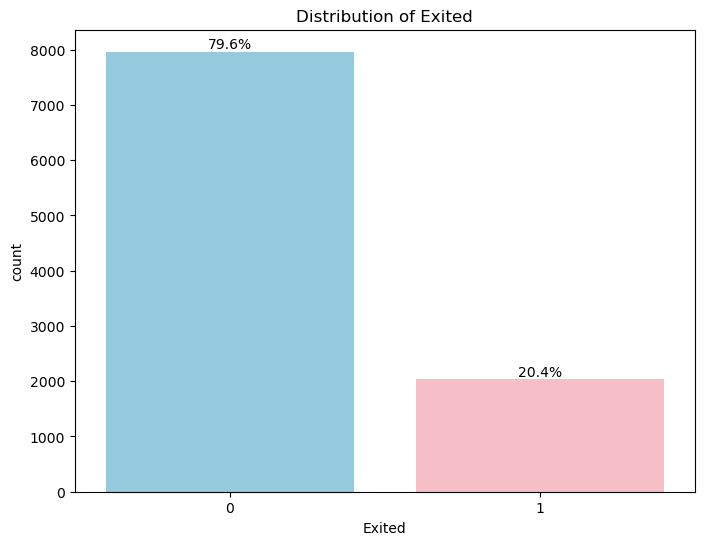

In [10]:
plt.figure(figsize=(8, 6))
palette = {0: "skyblue", 1: "lightpink"}  # Custom colors for each category
ax = sns.countplot(x='Exited', data=df, palette=palette)
plt.title('Distribution of Exited')

total = len(df['Exited'])

for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()


- There are 20% people who exited from the credit card

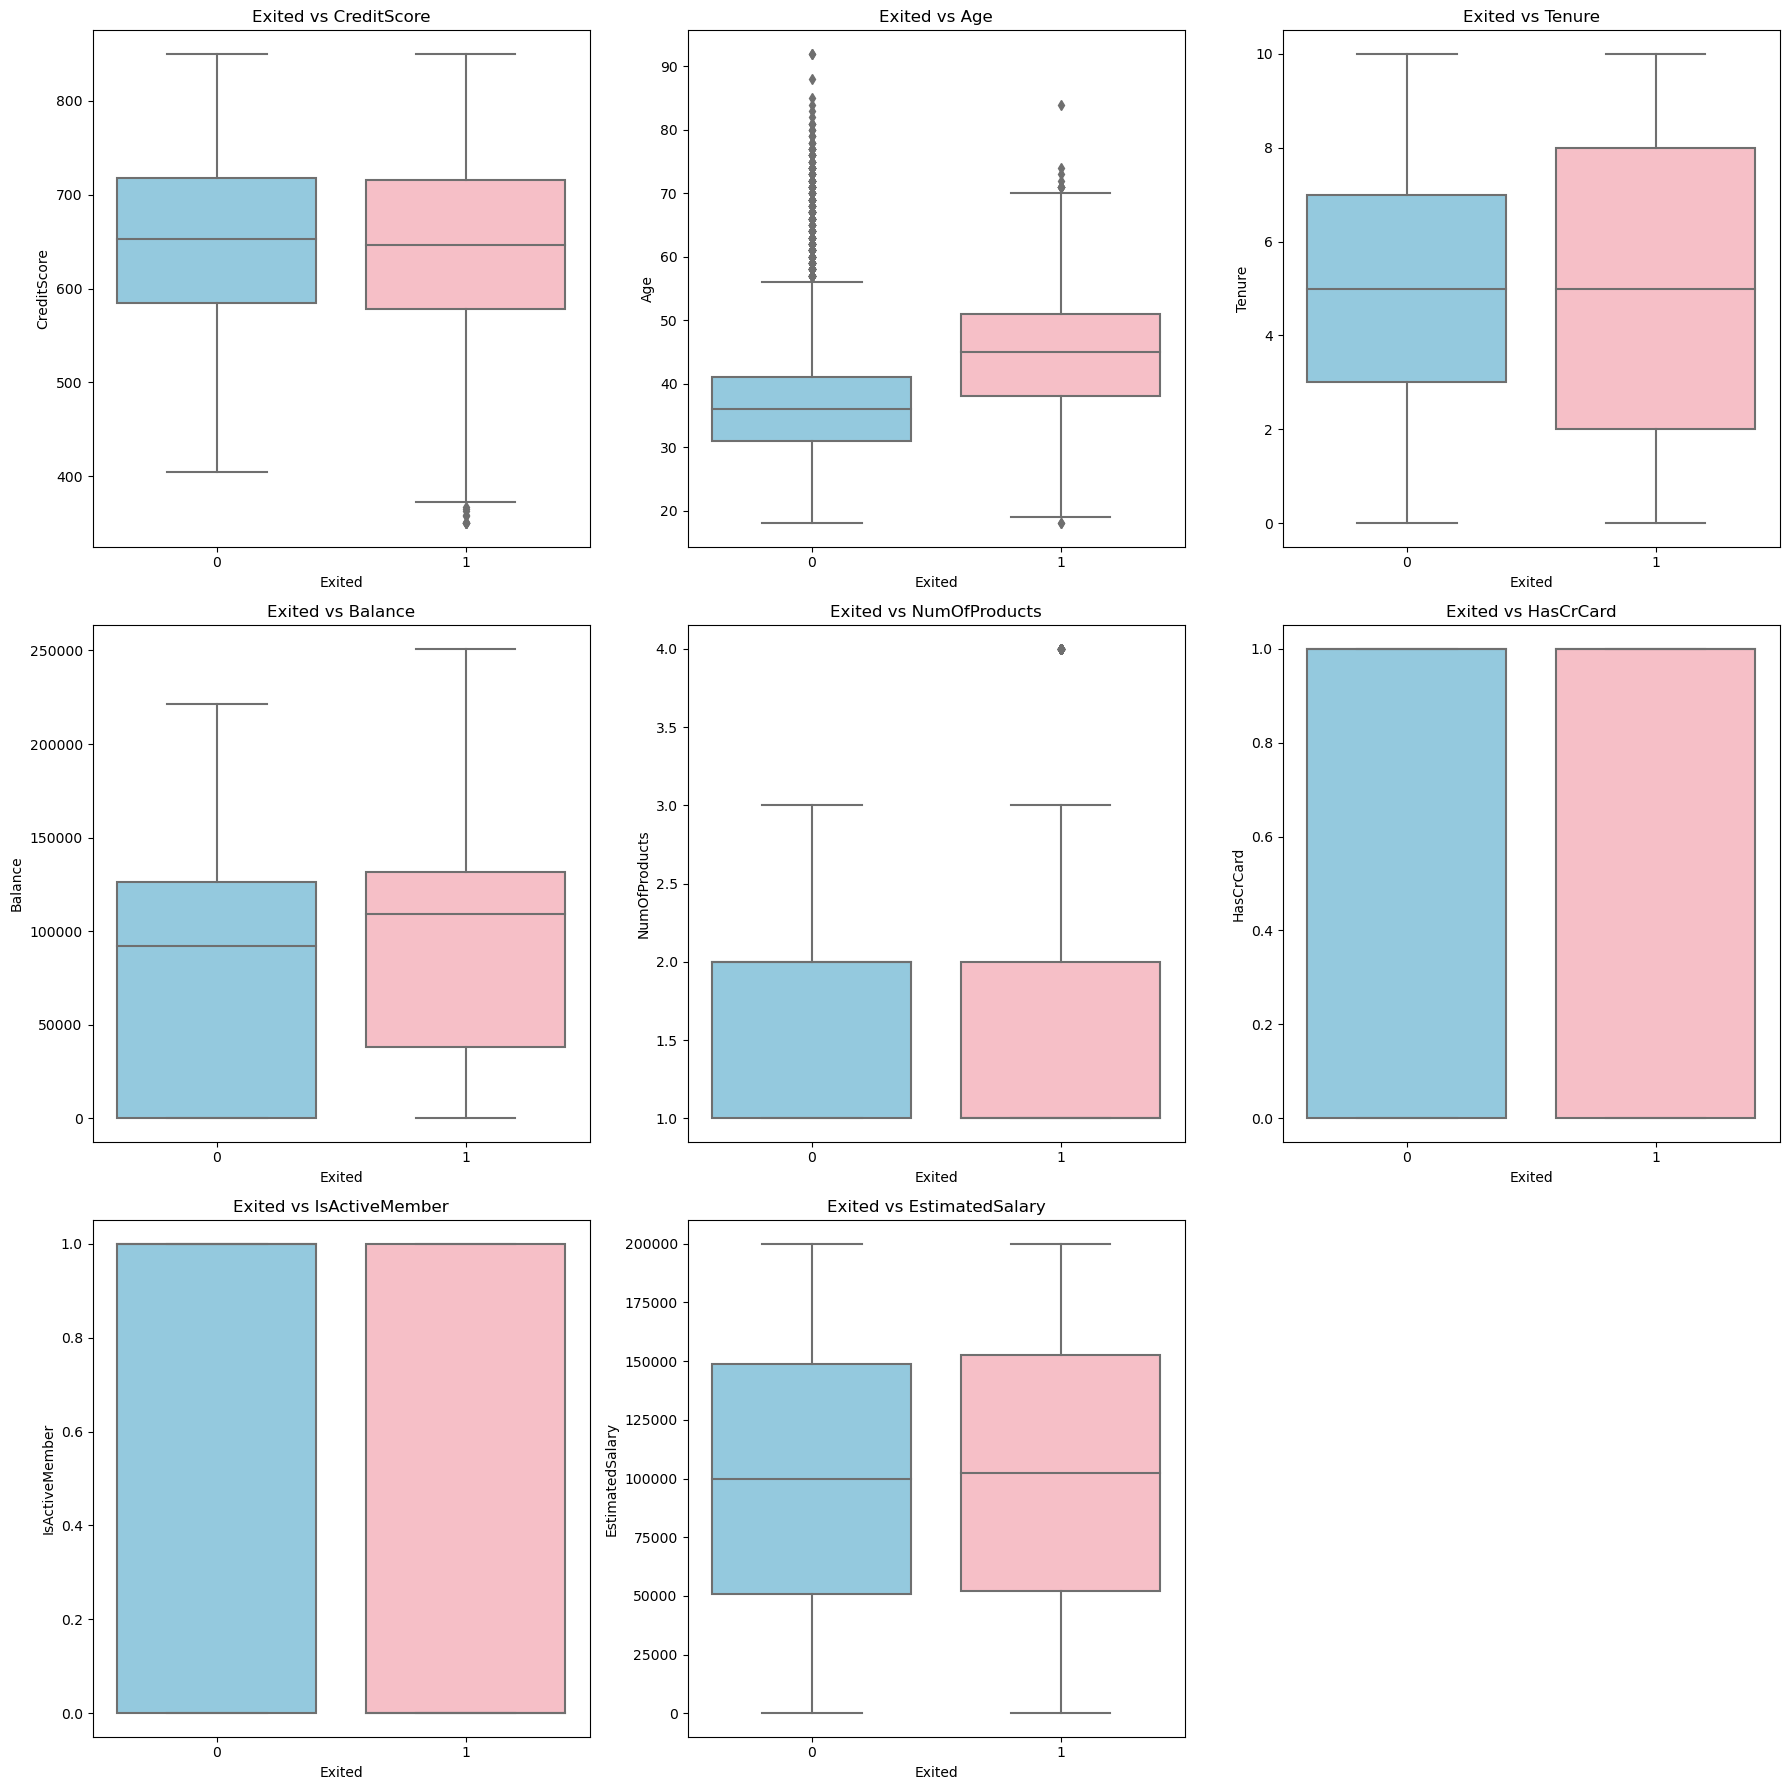

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

numeric_columns = [col for col in df.select_dtypes(include=[np.number]).columns if col != 'Exited']

n_cols = 3
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 6 * n_rows))
axes = axes.flatten()

# Define a palette to differentiate boxes by 'Exited' value
palette = {0: "skyblue", 1: "lightpink"}  # Customize the colors as needed

for idx, col in enumerate(numeric_columns):
    sns.boxplot(x='Exited', y=col, data=df, ax=axes[idx], palette=palette)
    axes[idx].set_title(f'Exited vs {col}')

for ax in axes[len(numeric_columns):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

- Tenure : Median tenure is 5 years for both exited and not, but the range of exited is wider as 2 to 8 while not exited has 3 to 7 years of tenure range.
- Balance: Exited people have a little bit higher median balance.
- Age : The median age of those who exited is 45, with a range of 40 to 50, while the median age of those who did not exit is 35, with a range of 30 to 40. However, there are also many outliers over 60 who did not exit, indicating that the numerous outliers in the 'Exited' = 0 group suggest that while most customers who stay are younger, there is still a significant number of older customers who remain.

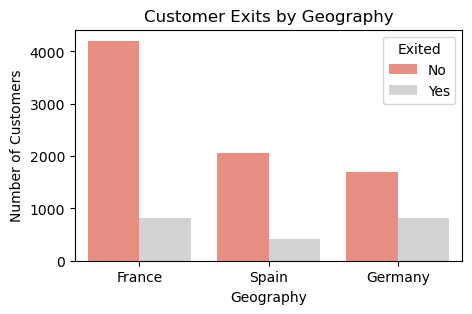

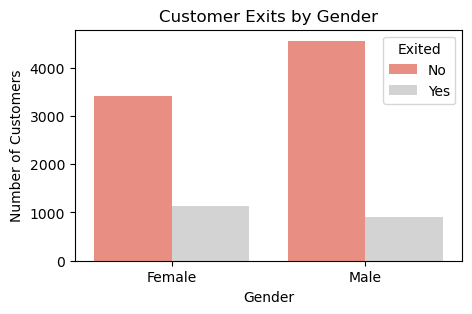

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample DataFrame setup (replace this with your actual DataFrame setup if needed)
# Assuming 'Geography' is the region, 'Gender' is another category, and 'Exited' is whether they exited (1) or not (0)
# df = pd.DataFrame(df) # Commented out because df is already a DataFrame

palette = {0: "salmon", 1: "lightgrey"}  # Custom colors for each category

# Plot for Customer Exits by Geography
plt.figure(figsize=(5, 3))  # Smaller figure size
sns.countplot(x='Geography', hue='Exited', data=df, palette=palette)
plt.title('Customer Exits by Geography')
plt.xlabel('Geography')
plt.ylabel('Number of Customers')
plt.legend(title='Exited', labels=['No', 'Yes'])
plt.show()

# Plot for Customer Exits by Gender
plt.figure(figsize=(5, 3))  # Smaller figure size
sns.countplot(x='Gender', hue='Exited', data=df, palette=palette)
plt.title('Customer Exits by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.legend(title='Exited', labels=['No', 'Yes'])
plt.show()


- Country : France has higher exite than other countries
- Gender : Male tend to exite more than female

## #check multicolinearity of data by VIF

In [13]:
from statsmodels.tools.tools import add_constant

# check numeric_df VIF
numeric_df = numeric_df.select_dtypes(include=[np.number])
X = add_constant(numeric_df)

# Create a DataFrame to hold VIF scores
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

          Variable        VIF
0            const  80.392721
1      CreditScore   1.001533
2              Age   1.110301
3           Tenure   1.001915
4          Balance   1.116342
5    NumOfProducts   1.103402
6        HasCrCard   1.001105
7   IsActiveMember   1.046479
8  EstimatedSalary   1.000989
9           Exited   1.145213


# 2) Run Classification Algorithms

## #Checking the number of categorical data

In [14]:
# Select columns that are not of numeric data type
non_numeric_df = df.select_dtypes(exclude=[np.number])
non_numeric_df.head(5)

,Geography,Gender
0,France,Female
1,Spain,Female
2,France,Female
3,France,Female
4,Spain,Female


## #Encode categorical variables using get_dummies code

In [15]:
import pandas as pd

# Selecting the columns to create dummy variables
cols = ['Geography', 'Gender']

# Creating dummy variables
df_dummies = pd.get_dummies(df, columns=cols,dtype=int)
df = df_dummies

# Display the first few rows of the new DataFrame to verify the results
print(df.head())


   CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  Geography_France  \
0               1        101348.88       1                 1   
1               1        112542.58       0                 0   
2               0        113931.57       1                 1   
3               0         93826.63       0                 1   
4               1         79084.10       0                 0   

   Geography_Germany  Geography_Spain  Gender_Female  Gender_Male  
0                  0                0              1            0  
1                  0                1              1            0  
2 

## 1- Logistic regression

### - Run the model

In [16]:
# drop 'Exited' for X
X = df.drop(['Exited'], axis=1)
y = df['Exited']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Create a logistic regression classifier
# By default, it uses L2 regularization with a C parameter of 1
logreg = LogisticRegression()

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Predict the labels for the test set
y_pred = logreg.predict(X_test)


### - Precision  & recall score

In [17]:
# Generate and print a classification report and confusion matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.98      0.88      2386
           1       0.35      0.04      0.07       614

    accuracy                           0.79      3000
   macro avg       0.57      0.51      0.48      3000
weighted avg       0.71      0.79      0.71      3000



### - Confusion Matrix

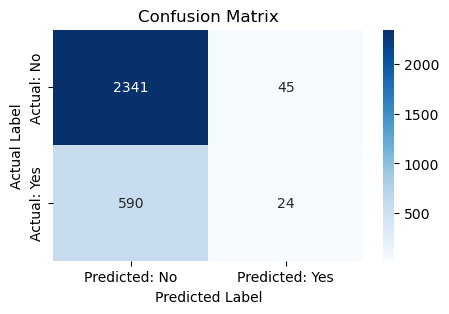

In [18]:
# Calculate confusion matrix
conf_matrix_values = confusion_matrix(y_test, logreg.predict(X_test))

# Create a DataFrame from the confusion matrix values
conf_matrix_df = pd.DataFrame(conf_matrix_values, 
                              index=['Actual: No', 'Actual: Yes'], 
                              columns=['Predicted: No', 'Predicted: Yes'])

# Plot using seaborn
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_df, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

## Insights :
The first row represents the actual negatives (the true class is "No"):

- True Negatives (TN): 2347 instances were correctly predicted as "No".
- False Positives (FP): 48 instances were incorrectly predicted as "Yes" (these are actual "No"s).

The second row represents the actual positives (the true class is "Yes"):

- False Negatives (FN): 572 instances were incorrectly predicted as "No" (these are actual "Yes"s).
- True Positives (TP): 33 instances were correctly predicted as "Yes".

### - ROC & AUC

AUC : 0.5101139655591383


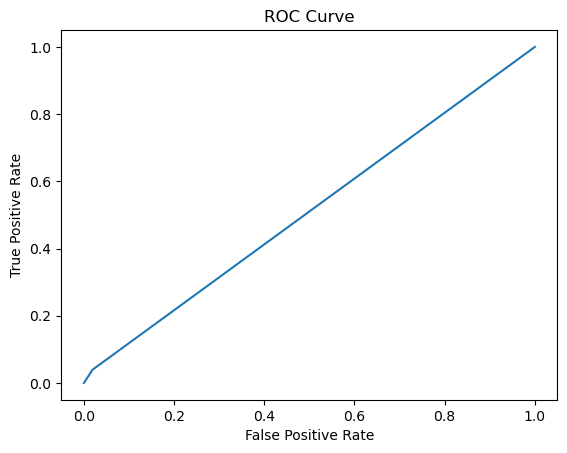

In [19]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score,auc

# Predict on test set
y_test_pred = logreg.predict(X_test)

# Threshold probabilities to get binary predictions
threshold = 0.5
y_pred_binary = (y_test_pred >= threshold).astype(int)

#ROC curve
fpr,tpr,thresholds= roc_curve(y_test,y_test_pred)

#AUC
AUC= auc(fpr,tpr)

plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

print(f'AUC : {AUC}')

- AUC of 0.5 suggests no discriminative power, akin to random guessing

## 2- Random Forest

### - Run the model

In [20]:
from sklearn.ensemble import RandomForestClassifier

#Train the randome forest model with np.random.seed(seed=5566)
np.random.seed(seed=5566)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

#Predict the test data
y_pred = clf.predict(X_test)

# then compute MSE.
mse_test = mean_squared_error(y_test, y_pred)

print('MSE test:', mse_test)

MSE test: 0.146


### - Precision  & recall score

In [21]:
# Generate and print a classification report and confusion matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2386
           1       0.75      0.43      0.55       614

    accuracy                           0.85      3000
   macro avg       0.81      0.70      0.73      3000
weighted avg       0.84      0.85      0.84      3000



### - Confusion Matrix

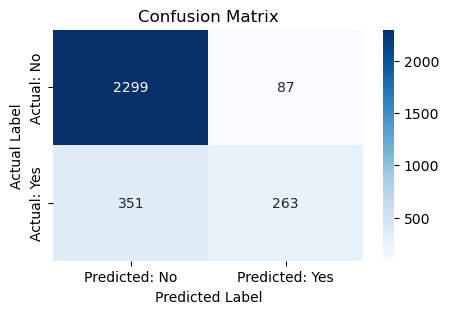

In [22]:
# Calculate confusion matrix
conf_matrix_values = confusion_matrix(y_test, clf.predict(X_test))

# Create a DataFrame from the confusion matrix values
conf_matrix_df = pd.DataFrame(conf_matrix_values, 
                              index=['Actual: No', 'Actual: Yes'], 
                              columns=['Predicted: No', 'Predicted: Yes'])

# Plot using seaborn
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_df, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

## Insights :
The first row represents the actual negatives (the true class is "No"):

- True Negatives (TN): 2318 instances were correctly predicted as "No".
- False Positives (FP): 77 instances were incorrectly predicted as "Yes" (these are actual "No"s).

The second row represents the actual positives (the true class is "Yes"):

- False Negatives (FN): 338 instances were incorrectly predicted as "No" (these are actual "Yes"s).
- True Positives (TP): 267 instances were correctly predicted as "Yes".

### - ROC & AUC

AUC : 0.6959380315685145


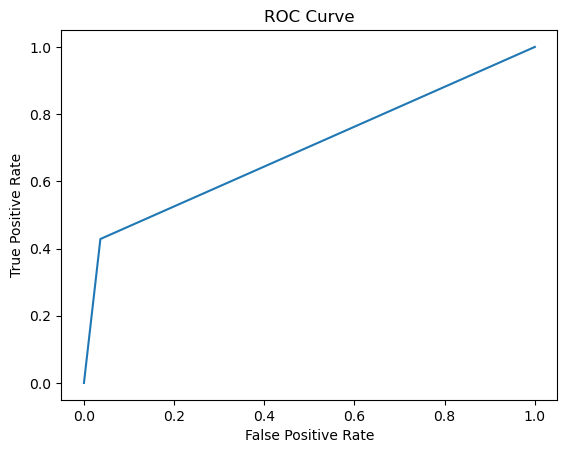

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score,auc

# Predict on test set
y_test_pred = clf.predict(X_test)

# Threshold probabilities to get binary predictions
threshold = 0.5
y_pred_binary = (y_test_pred >= threshold).astype(int)

#ROC curve
fpr,tpr,thresholds= roc_curve(y_test,y_test_pred)

#AUC
AUC= auc(fpr,tpr)

plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

print(f'AUC : {AUC}')

- The AUC is currently at 0.7, indicating a fair level of distinction between the positive and negative classes

## 3- Support Vector Machine (SVM)

### - Run the model

In [24]:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [25]:
# Create SVM classifier
svm_classifier = SVC(kernel='linear')  # Using a linear kernel

# Train the model
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear')

### - Confusion Matrix

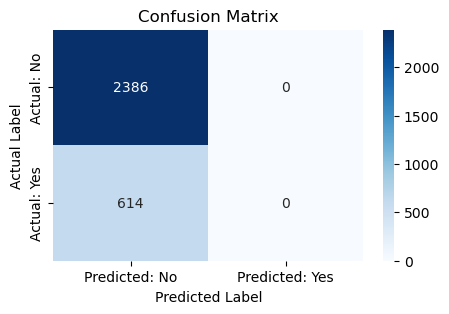

In [26]:
# Calculate confusion matrix
conf_matrix_values = confusion_matrix(y_test, svm_classifier.predict(X_test))

# Create a DataFrame from the confusion matrix values
conf_matrix_df = pd.DataFrame(conf_matrix_values, 
                              index=['Actual: No', 'Actual: Yes'], 
                              columns=['Predicted: No', 'Predicted: Yes'])

# Plot using seaborn
plt.figure(figsize=(5, 3))
sns.heatmap(conf_matrix_df, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

## Insights :
The first row represents the actual negatives (the true class is "No"):

- True Negatives (TN): 2395 instances were correctly predicted as "No".
- False Positives (FP): 0 instances were incorrectly predicted as "Yes" (these are actual "No"s).

The second row represents the actual positives (the true class is "Yes"):

- False Negatives (FN): 605 instances were incorrectly predicted as "No" (these are actual "Yes"s).
- True Positives (TP): 0 instances were correctly predicted as "Yes".

### - Precision  & recall score

In [27]:
# Predictions
y_pred = svm_classifier.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2386
           1       0.00      0.00      0.00       614

    accuracy                           0.80      3000
   macro avg       0.40      0.50      0.44      3000
weighted avg       0.63      0.80      0.70      3000



### - ROC & AUC

AUC : 0.5


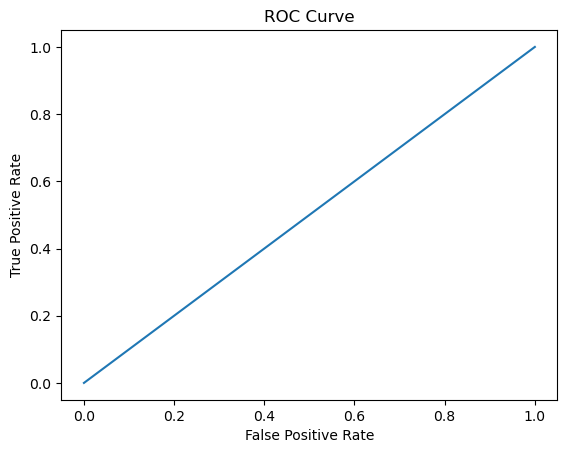

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score,auc

# Predict on test set
y_test_pred = svm_classifier.predict(X_test)

# Threshold probabilities to get binary predictions
threshold = 0.5
y_pred_binary = (y_test_pred >= threshold).astype(int)

#ROC curve
fpr,tpr,thresholds= roc_curve(y_test,y_test_pred)

#AUC
AUC= auc(fpr,tpr)

plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

print(f'AUC : {AUC}')

- AUC of 0.5 suggests no discriminative power, akin to random guessing